# Importing Necessary Modules

In [13]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from mpl_toolkits.mplot3d import Axes3D
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
sb.set()

fashiondata_raw = pd.read_csv('fashion_data_2018_2022.csv')
fashiondata_extracted = pd.DataFrame(fashiondata_raw[["gender", "color", "price", "material", "year_of_sale", "age_group", "season", "category", "sales_count", "average_rating"]])

df = fashiondata_extracted.groupby(['year_of_sale', 'season', 'category']).sum()
pivoted = pd.pivot_table(df, values='sales_count', index=['year_of_sale', 'season'], columns=['category'])
pivoted = pivoted.fillna(0).astype(int)

summed_sales = pivoted.sum(axis=1)
finaldataset = pd.DataFrame(summed_sales, columns=['total_sales'])

# Using One-Hot Encoding for Categorical Predictors
### One-hot encoding is a technique used to convert categorical data into a numerical format that can be provided to machine learning algorithms to improve the performance of a model.

In [14]:
ohe = OneHotEncoder()

# OneHotEncoding of categorical predictors (not the response)
fashiondata_extracted_cat = fashiondata_extracted[['material','season', 'color', 'category']]
ohe.fit(fashiondata_extracted_cat)
fashiondata_extracted_cat_ohe = pd.DataFrame(ohe.transform(fashiondata_extracted_cat).toarray(), 
                                  columns=ohe.get_feature_names_out(fashiondata_extracted_cat.columns))

# Check the encoded variables
fashiondata_extracted_cat_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   material_Cotton        660 non-null    float64
 1   material_Cotton Blend  660 non-null    float64
 2   material_Denim         660 non-null    float64
 3   material_Leather       660 non-null    float64
 4   material_Synthetic     660 non-null    float64
 5   material_Viscose       660 non-null    float64
 6   material_Wool          660 non-null    float64
 7   season_All             660 non-null    float64
 8   season_Autumn          660 non-null    float64
 9   season_Spring          660 non-null    float64
 10  season_Summer          660 non-null    float64
 11  season_Winter          660 non-null    float64
 12  color_Beige            660 non-null    float64
 13  color_Black            660 non-null    float64
 14  color_Brown            660 non-null    float64
 15  color_

In [15]:
fashiondata_extracted_num = fashiondata_extracted[['price','sales_count','average_rating', 'year_of_sale']]
fashiondata_extracted_res = fashiondata_extracted['gender']
fashiondata_ohe = pd.concat([fashiondata_extracted_num, fashiondata_extracted_cat_ohe, fashiondata_extracted_res], 
                           sort = False, axis = 1).reindex(index=fashiondata_extracted_num.index)

# Check the final dataframe
fashiondata_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 37 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  660 non-null    float64
 1   sales_count            660 non-null    int64  
 2   average_rating         660 non-null    float64
 3   year_of_sale           660 non-null    int64  
 4   material_Cotton        660 non-null    float64
 5   material_Cotton Blend  660 non-null    float64
 6   material_Denim         660 non-null    float64
 7   material_Leather       660 non-null    float64
 8   material_Synthetic     660 non-null    float64
 9   material_Viscose       660 non-null    float64
 10  material_Wool          660 non-null    float64
 11  season_All             660 non-null    float64
 12  season_Autumn          660 non-null    float64
 13  season_Spring          660 non-null    float64
 14  season_Summer          660 non-null    float64
 15  season

# Splitting Data into Train and Test Dataset

In [16]:
y = pd.DataFrame(fashiondata_ohe['gender'])
X = pd.DataFrame(fashiondata_ohe.drop('gender', axis = 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Fitting Data into Random Forest Classifier

In [17]:
rforest = RandomForestClassifier(n_estimators = 100,   
                                 max_depth = 4)       

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.gender.ravel())

RandomForestClassifier(max_depth=4)

# Confusion Matrix and Performance Metrics for Training Data

Train Data
Accuracy  :	 0.7797979797979798

TPR Train :	 0.6329113924050633
TNR Train :	 0.9147286821705426

FPR Train :	 0.08527131782945736
FNR Train :	 0.3670886075949367


<Axes: >

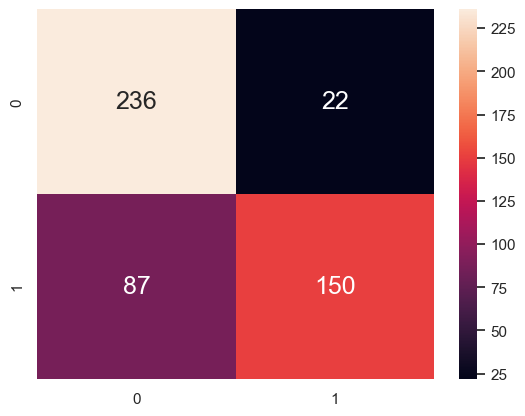

In [18]:
y_train_pred = rforest.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", rforest.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
from sklearn.metrics import confusion_matrix

sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Confusion Matrix and Performance Metrics for Testing Data

Test Data
Accuracy  :	 0.46060606060606063

TPR Test :	 0.358695652173913
TNR Test :	 0.589041095890411

FPR Test :	 0.410958904109589
FNR Test :	 0.6413043478260869


<Axes: >

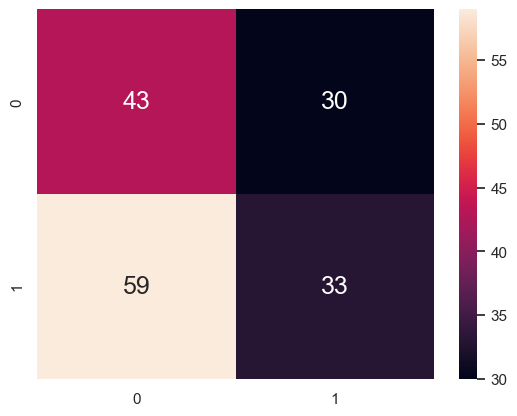

In [20]:
y_test_pred = rforest.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", rforest.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})